<a href="https://colab.research.google.com/github/Brunojp178/PI/blob/Semana-4/PI_Tarefa_5_(Quarta_Semana_(ERE)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Limiarização de Imagens

Nos vídeos abaixo, eu discuto o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving master.jpg to master.jpg


In [ ]:
#insira seu código aqui
import numpy as np
import cv2
import time
from tqdm import tqdm


def main():
  # Load the images
  img = imgLoad("master.jpg")
  copy = img.copy()

  # Cria a janela
  winTitle = "Ex 1 - semana 4"
  cv2.namedWindow(winTitle)

  # Cria a trackbar
  cv2.createTrackbar("Contrast", winTitle, 100, 100, onChange)
  cv2.createTrackbar("Brightness", winTitle, 0, 100, onChange)

  # Valor anterior da trackbar
  old_contrast = 100
  flag_contrast = False
  counter_time = 0

  old_brightness = 0
  flag_brightness = False


  while True:
    # Valor da trackbar
    contrast_value = cv2.getTrackbarPos("Contrast", winTitle)
    brightness_value = cv2.getTrackbarPos("Brightness", winTitle)

    # Trackbar de contraste alterada
    if old_contrast != contrast_value:
        flag_contrast = True
        counter_time = time.time()
        old_contrast = contrast_value
    # trackbar de brilho alterada
    if old_brightness != brightness_value:
        flag_brightness = True
        counter_time = time.time()
        old_brightness = brightness_value


    # Após um segundo da alteração, o contraste é atualizado
    if time.time() - counter_time > 1:
        if flag_contrast or flag_brightness:
            '''
            height, width, channels = img.shape
            copy = img.copy()

            for y in tqdm(range(height)):
                for x in range(width):
                    for c in range(channels):
                        new_color = copy[y][x][c] * (contrast_value / 100) + brightness_value
                        copy[y][x][c] = np.clip(new_color, 0, 255)
            '''
            copy = cv2.convertScaleAbs(img, alpha = contrast_value/100, beta = brightness_value)

            flag_contrast = False
            flag_brightness = False


    # Mostra a copia imagem
    cv2.imshow(winTitle, copy)

    # Se tecla 'esc' ou tecla 'q' for pressionada, fecha a aplicação
    if cv2.waitKey(1) & 0xFF == ord('q') or cv2.waitKey(1) & 0xFF == 27: break

  cv2.destroyAllWindows()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def onChange(value):
    pass

main()


#2. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>

Explique com suas palavras no áudio qual foi o efeito e quando cada filtro deve ser aplicado.

Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

99


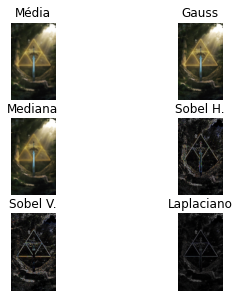

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def main():
    img = imgLoad("master.jpg")

    # Filters -------------------------------------------
    # Value between [0, 99]
    filter_percentage = 200
    filter_percentage = np.clip(filter_percentage, 0, 99)

    # media
    media = applyFilter(img, "media", filter_percentage)
    # Gauss filter
    gauss = applyFilter(img, "Gauss", filter_percentage)
    # Median filter
    mediana = applyFilter(img, "mediana", filter_percentage)
    # Sobel Horizontal
    sobelX = applyFilter(img, "sobelHorizontal", filter_percentage)
    # Sobel Vertical
    sobelY = applyFilter(img, "sobelVertical", filter_percentage)
    # Laplacian
    laplacian = applyFilter(img, "laplaciano", filter_percentage)

    imageList = [media, gauss, mediana, sobelX, sobelY, laplacian]
    imageTitles = ["Média", "Gauss", "Mediana", "Sobel H.", "Sobel V.", "Laplaciano"]

    # col, lin
    colunas = 2
    linhas = 3

    # Plot the images in grid
    showImageGrid(imageList, imageTitles, colunas, linhas)

    cv2.waitKey(0)

    cv2.destroyAllWindows()

# Função que aplica os filtros
def applyFilter(img, filter_name, percentage):

    # possible filters
    filter_name = filter_name.lower()
    filters = ["media", "gauss", "mediana", "sobelvertical", "sobelhorizontal", "laplaciano"]
    if not (filter_name in filters): print("Filtro não encontrado!"); return
    # Copy the original image
    img_output = img.copy()
    # todos os filtros utilizam aproximadamente valores de 0 a 10
    percentage = int(percentage/10)
    if percentage < 1: percentage = 1; print("Argumento menor que 1, resetado!")


    # filtro de média
    if filter_name == "media":
        img_output = cv2.blur(img, (percentage, percentage))
    # Filtro de Gauss
    if filter_name == "gauss":
        if percentage % 2 == 0:
            # Se a var percentage for um número par, subtrai um e divide por 10 (60 -> 5,9 -> 5)
            # e se essa conta for menor que 1, reseta o valor para 1
            percentage -= 1
            img_output = cv2.GaussianBlur(img, (percentage, percentage), 0)
        else:
            img_output = cv2.GaussianBlur(img, (percentage, percentage), 0)

    # Filtro de mediana!
    if filter_name == "mediana":
        img_output = cv2.medianBlur(img, percentage)

    # Filtro Sobel
    if filter_name == "sobelvertical":
        img_output = cv2.Sobel(img, cv2.CV_64F, 0, 1, percentage)
        img_output = np.uint8(np.absolute(img_output))

    if filter_name == "sobelhorizontal":
        img_output = cv2.Sobel(img, cv2.CV_64F, 1, 0, percentage)
        img_output = np.uint8(np.absolute(img_output))

    if filter_name == "laplaciano":
        img_output = cv2.Laplacian(img, cv2.CV_64F, percentage)
        img_output = np.uint8(np.absolute(img_output))

    return img_output

def showImageGrid(imgList, titleList, x, y):
    if x < 1 or y < 1: print("ERRO: Valores de X e Y não podem ser menores que 1"); return

    fig, axis = plt.subplots(y, x)
    # Counters
    xIndex, yIndex, titleIndex = 0, 0, 0

    for img in imgList:
        axis[yIndex, xIndex].set_title(titleList[titleIndex])
        axis[yIndex, xIndex].imshow(img)

        # Removes the axis from the images
        axis[yIndex,xIndex].axis('off')

        # Increment the counters
        titleIndex += 1
        xIndex += 1

        # If new line, reset x value
        if xIndex == x:
            xIndex = 0
            yIndex += 1

    # Less space between the plots
    fig.tight_layout(pad=0.2)
    plt.show()

def imgLoad(name):
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

main()


#3. Recapitulação

Acesse o SIGAA e no fórum "Recapitulação do Primeiro Mês", responda as seguintes perguntas com suas palavras:

* O que é o Processamento de Imagens?
* O que são modelos de cor (exemplo: RGB, HSV) e para que servem?
* Liste conhecimentos que você aprendeu até aqui e exemplo de uso dos mesmos.
